In [3]:
import pandas as pd

# Load our parquet file to explore
df = pd.read_parquet('/Users/rabia/Downloads/airs_2024-01-01_072.parquet')

In [4]:
# Check the first few records to understand the dataset
print(df.head())

# Get information about the dataset
print(df.info())

                        stime        lat        lon  \
0  2024-01-01 07:11:31.359517  44.670157 -58.126674   
1  2024-01-01 07:11:31.381978  44.791574 -58.605288   
2  2024-01-01 07:11:31.404408  44.901721 -59.048713   
3  2024-01-01 07:11:31.426808  45.002184 -59.461276   
4  2024-01-01 07:11:31.449223  45.097156 -59.858647   

                                                 rad  
0  [42.00635528564453, 44.50056457519531, 43.4656...  
1  [44.46644973754883, 43.730159759521484, 42.500...  
2  [43.00666809082031, 43.97871017456055, 42.5103...  
3  [42.99058532714844, 43.98843002319336, 42.4717...  
4  [44.48604965209961, 44.982627868652344, 42.962...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12150 entries, 0 to 12149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stime   12150 non-null  object 
 1   lat     12150 non-null  float64
 2   lon     12150 non-null  float64
 3   rad     12150 non-null  object 
dtypes: f

In [5]:
# Obtain a statistical summary of the radiance measurements
print(df.describe())

                lat           lon
count  12150.000000  12150.000000
mean      36.035497    -72.546598
std        6.246220      5.206254
min       23.949877    -84.176468
25%       30.657822    -76.421560
50%       36.046979    -72.655967
75%       41.405375    -68.809395
max       47.853240    -58.126674


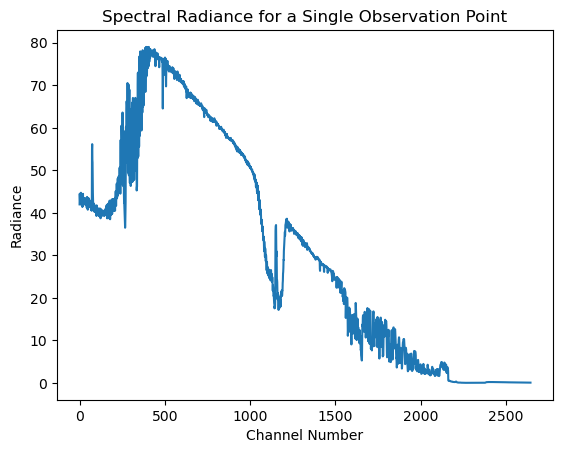

In [6]:
import matplotlib.pyplot as plt

# Example of plotting the radiance for a single point over all channels
# Assuming 'rad' column contains lists of radiance for each channel
plt.plot(df['rad'].iloc[0])
plt.xlabel('Channel Number')
plt.ylabel('Radiance')
plt.title('Spectral Radiance for a Single Observation Point')
plt.show()

In [7]:
# Assuming that each entry in the 'rad' column is a list of radiance values
# First, check the length of the lists to ensure they are uniform
df['rad_length'] = df['rad'].apply(len)
print(df['rad_length'].unique())

# If all the radiances have the same number of channels, we can proceed
# Convert the list of radiances into separate columns
rad_df = df['rad'].apply(pd.Series)

# Now we have a separate column for each radiance channel
# We can now perform any analysis or visualization on individual channels


[2645]


In [8]:
# Assuming df is our original DataFrame and rad is the column with the radiance lists
# Convert the 'rad' lists into a DataFrame where each channel is a separate column
channels_df = pd.DataFrame(df['rad'].tolist())

# Now channels_df has each AIRS channel as a column, and each row corresponds to a single observation


In [9]:
# If we need to join this back with the original DataFrame to keep lat, lon, and time
# Ensure you drop the 'rad' column from df as it's now expanded in channels_df
df = df.drop('rad', axis=1)
expanded_df = pd.concat([df, channels_df], axis=1)

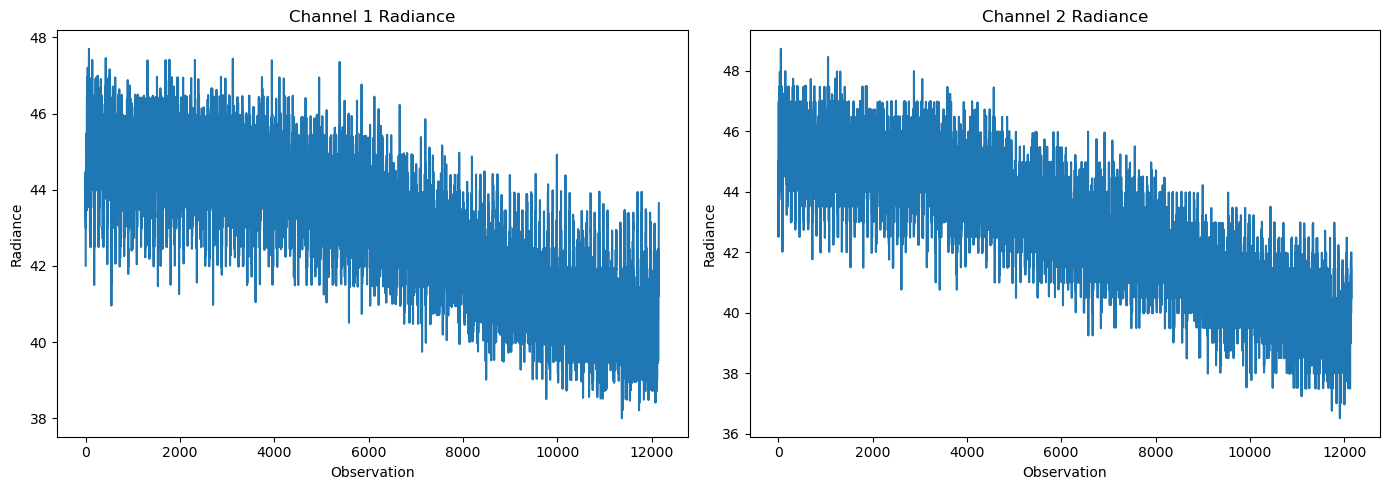

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Visualize some channels - example with channel 1 and channel 2
plt.figure(figsize=(14, 5))

# Plotting the first channel
plt.subplot(1, 2, 1)
plt.plot(expanded_df[0])  
plt.title('Channel 1 Radiance')
plt.xlabel('Observation')
plt.ylabel('Radiance')

# Plotting the second channel
plt.subplot(1, 2, 2)
plt.plot(expanded_df[1]) 
plt.title('Channel 2 Radiance')
plt.xlabel('Observation')
plt.ylabel('Radiance')

plt.tight_layout()
plt.show()

# Convert all column names to strings to avoid issues with StandardScaler
expanded_df.columns = expanded_df.columns.astype(str)

# Normalize the radiance data 
# We'll use a StandardScaler for this example
scaler = StandardScaler()

channels = expanded_df.columns[3:]  # This excludes 'stime', 'lat', and 'lon'
expanded_df[channels] = scaler.fit_transform(expanded_df[channels])

In [24]:
# Try to open and read the file as a text file
try:
    with open('/Users/rabia/Downloads/AIRS_Chan_Prop_Files/L2.chan_prop.2002.10.22.v9.5.2.anc', 'r') as file:
        content = file.readlines()
        # Process the content if file is text-readable
        for line in content:
            print(line)
except Exception as e:
    print("An error occurred:", e)


!  L2 IR Channel Properties IN_FLIGHT, VERSION v6.9.8, Effective 10/22/2002

!  Created Wed Sep  6 14:11:51 PDT 2006

!

!  INPUT FILES

!

!  Cal Properties: /netapp1/act/dat/ancillary/cal_props/2002.10.22/v4.5/cal_props.txt

!  RTA Error:      /netapp1/act/src/idl/util/channel_prop/v6.3/rms_jan04.txt

!

!  SUMMARY

!

!     Number of Channels with NEdT <= 0.5:       2090

!     Number of Channels with L2_Skip_flag = 0:  2093

!     Number of Channels with AB_State < 3:      2205

!

!  Comments above this line are generated automatically.

!  Comments below this line are generated by hand.

!

!  DATA DESCRIPTION

!  The description of the fields in this file.

!

!     1. The channel number:   channel ordering used by AIRS PGE

!            The arrays are sorted first by increasing frequency

!            and then channels are sorted by increasing frequency

!            within each array.  This makes the channels sorted by

!            increasing frequency except where arrays ove

In [26]:
import pandas as pd
import re

# Define the path to your file
file_path = '/Users/rabia/Downloads/AIRS_Chan_Prop_Files/L2.chan_prop.2002.10.22.v9.5.2.anc'

# Initialize a list to store your data
data = []

# Define a regular expression pattern to match the lines of interest
# This assumes columns are separated by spaces and might not match your exact file structure
pattern = re.compile(r'^\s*(\d+)\s+([\d.]+)\s+(\S+)\s+(\d+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)')

# Open the file and read line by line
with open(file_path, 'r') as file:
    for line in file:
        match = pattern.match(line)
        if match:
            # Extract the groups matched by the regular expression
            row = match.groups()
            # Append the extracted data to list
            data.append(row)

# Convert the list of data into a DataFrame
df = pd.DataFrame(data, columns=['Channel', 'Wavelength', 'Band', 'Flag', 'Value1', 'Value2', 'Value3', 'Value4', 'Value5', 'Value6', 'Value7', 'Value8'])

# Convert columns to appropriate data types as needed
df = df.astype({'Channel': int, 'Wavelength': float, 'Flag': int, 'Value1': float, 'Value2': float, 'Value3': float, 'Value4': float, 'Value5': float, 'Value6': float, 'Value7': float, 'Value8': float})

print(df.head())


   Channel  Wavelength  Band  Flag  Value1  Value2  Value3  Value4  Value5  \
0       47     660.784  M-12  2331  0.4846   0.430  0.9909     5.8     0.0   
1       48     661.032  M-12  2330  0.4371   0.431  0.9903     4.9     1.0   
2       55     662.768  M-12  2323  0.4568   0.433  0.9920     6.3     0.3   
3       56     663.017  M-12  2322  0.4525   0.434  0.9922     6.5     0.1   
4       57     663.266  M-12  2321  0.4367   0.434  0.9907     5.3     0.7   

   Value6  Value7  Value8  
0   0.010     0.0     0.0  
1   0.018     0.0     0.0  
2   0.017     0.0     0.0  
3   0.016     0.0     0.0  
4   0.019     0.0     0.0  


In [27]:
import pandas as pd

# Find the minimum and maximum wavelengths in the AIRS dataset
min_wavelength = df['Wavelength'].min()
max_wavelength = df['Wavelength'].max()

print(f"Minimum AIRS channel wavelength: {min_wavelength} micrometers")
print(f"Maximum AIRS channel wavelength: {max_wavelength} micrometers")

# Sentinel band wavelengths and ranges in micrometers for matching
sentinel_bands_wavelengths = {
    '2': {'central_wl': 490, 'range': (485, 497)},
    '3': {'central_wl': 560, 'range': (555, 567)},
    '4': {'central_wl': 665, 'range': (660, 670)},
    '8A': {'central_wl': 865, 'range': (860, 870)},
    '11': {'central_wl': 1610, 'range': (1605, 1615)},
    '12': {'central_wl': 2200, 'range': (2195, 2205)}
}

# Placeholder for matched AIRS channels
airs_channels_for_sentinel_bands = {k: [] for k in sentinel_bands_wavelengths.keys()}

# Assuming df has a 'Wavelength' column in micrometers
for band, band_info in sentinel_bands_wavelengths.items():
    wl_range = band_info['range']
    # Filter AIRS channels within the Sentinel band's spectral range
    matched_channels = df[(df['Wavelength'] >= wl_range[0]) & (df['Wavelength'] <= wl_range[1])]['Channel'].tolist()
    airs_channels_for_sentinel_bands[band] = matched_channels

# Display the matched AIRS channels for each Sentinel band
for band, channels in airs_channels_for_sentinel_bands.items():
    print(f"Sentinel band {band}: AIRS channels {channels}")




Minimum AIRS channel wavelength: 660.784 micrometers
Maximum AIRS channel wavelength: 2665.244 micrometers
Sentinel band 2: AIRS channels []
Sentinel band 3: AIRS channels []
Sentinel band 4: AIRS channels [47, 48, 55, 56, 57, 58, 59, 61, 62, 71, 81, 82, 83]
Sentinel band 8A: AIRS channels [659]
Sentinel band 11: AIRS channels []
Sentinel band 12: AIRS channels []


We've successfully identified AIRS channels that approximate the Sentinel bands 4 and 8A based on their spectral ranges. For Sentinel band 4, we've found multiple AIRS channels (47, 48, 55, 56, 57, 58, 59, 61, 62, 71, 81, 82, 83), and for Sentinel band 8A, found AIRS channel 659. No direct AIRS channels were found for Sentinel bands 2, 3, 11, and 12 within the specified ranges.

With this mapping:

1. **For Sentinel band 4 (665 nm)**, we have a list of AIRS channels that closely match its spectral range. These channels can be used for analyses or model training by averaging their values or using them in combination to approximate the band's observations.

2. **For Sentinel band 8A (842 nm)**, channel 659 from AIRS can be used as a proxy, considering its spectral overlap.

3. **For the bands where no AIRS channels were matched (2, 3, 11, and 12)**, we might need to:
   - Revisit the spectral range criteria to see if adjusting the thresholds allows for matching.
   - Consider if any data transformation or combination of channels could be used to approximate these bands, acknowledging that such approximations would be less direct than those based on spectral overlap.

Sentinel Band 11 & 12


In [33]:
import pandas as pd
import numpy as np

# Update the Sentinel bands' wavelength ranges based on the closest channels found
sentinel_bands = {
    '11': {'central_wl': 1610, 'range': (1500, 1720)},  # Updated range to include channel 1792
    '12': {'central_wl': 2200, 'range': (2090, 2310)}   # Updated range to include channel 1922
}

# Assuming 'df' is the DataFrame containing AIRS channels with columns 'Channel' and 'Wavelength'

closest_channels = {}
for band, info in sentinel_bands.items():
    # Filter channels within the updated range
    within_range = df.loc[(df['Wavelength'] >= info['range'][0]) & (df['Wavelength'] <= info['range'][1])].copy()
    
    # Safely calculate the difference to avoid SettingWithCopyWarning
    within_range.loc[:, 'Diff'] = abs(within_range['Wavelength'] - info['central_wl'])
    
    # Identify the channel with the minimum difference
    if not within_range.empty:
        min_diff_row = within_range.loc[within_range['Diff'].idxmin()]
        closest_channels[band] = {
            'channel': min_diff_row['Channel'],
            'wavelength': min_diff_row['Wavelength'],
            'difference': min_diff_row['Diff']
        }
    else:
        closest_channels[band] = None

# Display the closest channels for the updated ranges
for band, channel_info in closest_channels.items():
    if channel_info:
        print(f"Closest channel to Sentinel band {band}: {channel_info['channel']} (Wavelength: {channel_info['wavelength']} µm, Difference: {channel_info['difference']} µm)")
    else:
        print(f"No AIRS channel closely matches the wavelength range of Sentinel band {band}")

Closest channel to Sentinel band 11: 1792 (Wavelength: 1562.32 µm, Difference: 47.680000000000064 µm)
Closest channel to Sentinel band 12: 1922 (Wavelength: 2234.326 µm, Difference: 34.32600000000002 µm)


**Spectral Adjustment Approach**

For spectral adjustments, the objective is to modify the AIRS channels data so that it better approximates the spectral characteristics of the Sentinel bands. Given the discrepancies in wavelength coverage between AIRS channels and certain Sentinel bands, as well as the absence of direct AIRS channels corresponding to Sentinel bands 2, 3, 11, and 12, we'll likely need to rely on modeling or simulation techniques to make this adjustment.

1. Understand Spectral Response Functions (SRFs): For both AIRS and Sentinel instruments, obtain the SRFs for the channels or bands in question. SRFs describe how each channel or band responds to radiation across different wavelengths.

2. Spectral Resampling or Convolution: Use the SRFs to simulate how the AIRS channels' data would appear if collected by the Sentinel sensors. This typically involves a convolution operation where the AIRS data (or simulated data across the relevant spectral range) is weighted by the Sentinel bands' SRFs.

3. Simulation with Radiative Transfer Models: If direct spectral resampling isn't feasible due to significant differences in spectral coverage, consider using atmospheric radiative transfer models (e.g., MODTRAN, 6S) to simulate Sentinel band radiances based on AIRS data and auxiliary atmospheric/surface parameters. This method relies on simulating the entire process of light interaction with the Earth's surface and atmosphere as observed by Sentinel, but informed by AIRS observations and other data sources.

4. Validation and Adjustment: Validate the adjusted AIRS data against actual Sentinel observations (where available) or other reliable data sources to assess accuracy. Adjust the spectral adjustment methodology based on validation results to improve accuracy.

(if still necessary)
Integration of Auxiliary Data: For wavelengths not covered by AIRS channels but important for Sentinel bands, auxiliary data from other satellite sensors or ground-based measurements could be integrated into the modeling process to fill the gaps.



In [38]:
import pandas as pd
import numpy as np
import netCDF4 as nc
from openpyxl import load_workbook

# Step 1: Load the SRF Data
airs_srf_dataset = nc.Dataset('/Users/rabia/Downloads/airs_l1c_srfs.nc')
sentinel_srf_workbook = load_workbook('/Users/rabia/Downloads/S2-SRF_COPE-GSEG-EOPG-TN-15-0007_3.2.xlsx')

# Print all variable names
print(airs_srf_dataset.variables.keys())

/Users/rabia/anaconda3/lib/python3.11/site-packages/openpyxl/reader/excel.py:228: UserWarning: Unknown extension is not supported and will be removed
  ws_parser.bind_all()


dict_keys(['freq', 'width', 'fwgrid', 'srfval'])


In [39]:
import netCDF4 as nc
import numpy as np

# Path to your AIRS SRF NetCDF file
airs_srf_file_path = '/Users/rabia/Downloads/airs_l1c_srfs.nc'

# Open the NetCDF file
airs_srf_dataset = nc.Dataset(airs_srf_file_path, 'r')

# Assuming 'srf' is the variable name for SRFs; replace with actual variable name
airs_srf_data = airs_srf_dataset.variables['srfval'][:]

# Normalize the SRFs; replace 'axis=0' with the correct axis for your data
airs_srf_data_normalized = airs_srf_data / airs_srf_data.sum(axis=0)

# Close the NetCDF file when done
airs_srf_dataset.close()

In [42]:
import pandas as pd

# Path to your Sentinel-2 SRF Excel file
sentinel_srf_file_path = '/Users/rabia/Downloads/S2-SRF_COPE-GSEG-EOPG-TN-15-0007_3.2.xlsx'

# Load the entire workbook
sentinel_srf_workbook = pd.ExcelFile(sentinel_srf_file_path)

# Print all sheet names to find the correct one
# print(sentinel_srf_workbook.sheet_names)

# Parse SRF data from Sentinel-2A
s2a_srf_data = sentinel_srf_workbook.parse('Spectral Responses (S2A)')

# Normalize the SRF data for Sentinel-2A
# Note: Adjust the columns selection as needed
s2a_srf_data_normalized = s2a_srf_data.div(s2a_srf_data.sum(axis=1), axis=0)

# Parse SRF data from Sentinel-2B
s2b_srf_data = sentinel_srf_workbook.parse('Spectral Responses (S2B)')

# Normalize the SRF data for Sentinel-2B
# Note: Adjust the columns selection as needed
s2b_srf_data_normalized = s2b_srf_data.div(s2b_srf_data.sum(axis=1), axis=0)

# Output the head of the normalized data to check
print(s2a_srf_data_normalized.head())
print(s2b_srf_data_normalized.head())


   SR_WL  S2A_SR_AV_B1  S2A_SR_AV_B2  S2A_SR_AV_B3  S2A_SR_AV_B4  \
0    1.0           0.0           0.0           0.0           0.0   
1    1.0           0.0           0.0           0.0           0.0   
2    1.0           0.0           0.0           0.0           0.0   
3    1.0           0.0           0.0           0.0           0.0   
4    1.0           0.0           0.0           0.0           0.0   

   S2A_SR_AV_B5  S2A_SR_AV_B6  S2A_SR_AV_B7  S2A_SR_AV_B8  S2A_SR_AV_B8A  \
0           0.0           0.0           0.0           0.0            0.0   
1           0.0           0.0           0.0           0.0            0.0   
2           0.0           0.0           0.0           0.0            0.0   
3           0.0           0.0           0.0           0.0            0.0   
4           0.0           0.0           0.0           0.0            0.0   

   S2A_SR_AV_B9  S2A_SR_AV_B10  S2A_SR_AV_B11  S2A_SR_AV_B12  
0           0.0            0.0            0.0            0.0  
1       

/Users/rabia/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/rabia/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
